In [1]:
import numpy as np

In [2]:
ket_0 = np.array([1, 0])
ket_1 = np.array([0, 1])

ket_0 / 2 + ket_1 / 2

array([0.5, 0.5])

In [4]:
M1 = np.array([[1, 1], [0, 0]])
M2 = np.array([[1, 1], [1, 0]])

M1 / 2 + M2 / 2

array([[1. , 1. ],
       [0.5, 0. ]])

In [5]:
np.matmul(M1, ket_0)

array([1, 0])

In [6]:
np.matmul(M1, M2)

array([[2, 1],
       [0, 0]])

In [7]:
np.matmul(M2, M1)

array([[1, 1],
       [1, 1]])

In [8]:
from qiskit.quantum_info import Statevector

In [9]:
u = Statevector([1 / np.sqrt(2), 1 / np.sqrt(2)])
v = Statevector([(1 + 2.0j) / 3, -2 / 3])
w = Statevector([1 / 3, 2 / 3])

In [10]:
u.draw("latex")

<IPython.core.display.Latex object>

In [11]:
v.draw("latex")

<IPython.core.display.Latex object>

In [12]:
v.is_valid()  # checks if the l2 norm is 1

True

In [13]:
w.is_valid()

False

In [17]:
v.measure()  # measurements are probablistic so it may return different values when run

('0',
 Statevector([0.4472136+0.89442719j, 0.       +0.j        ],
             dims=(2,)))

In [18]:
from qiskit.visualization import plot_histogram

stats = v.sample_counts(1000)

stats

{'0': 573, '1': 427}

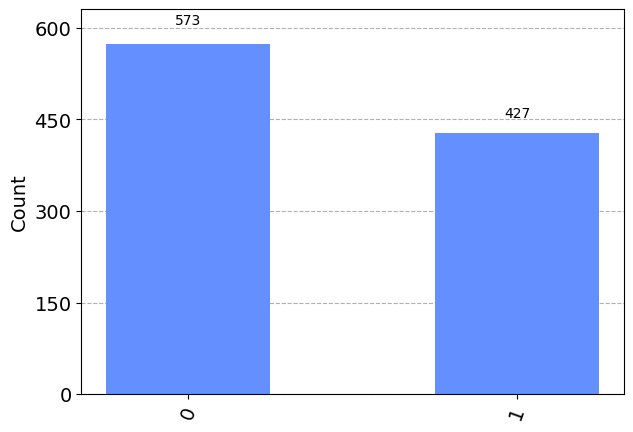

In [19]:
plot_histogram(stats)

In [21]:
from qiskit.quantum_info import Operator

X = Operator([[0, 1], [1, 0]])
Y = Operator([[0, -1.0j], [1.0j, 0]])
Z = Operator([[1, 0], [0, -1]])
H = Operator([[1 / np.sqrt(2), 1 / np.sqrt(2)], [1 / np.sqrt(2), -1 / np.sqrt(2)]])
S = Operator([[1, 0], [0, 1.0j]])
T = Operator([[1, 0], [0, (1 + 1.0j) / np.sqrt(2)]])

v = Statevector([1, 0])

v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(Z)

v.draw("text")

[ 0.85355339+0.35355339j,-0.35355339+0.14644661j]

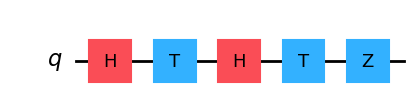

In [29]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(1)

circuit.h(0)
circuit.t(0)
circuit.h(0)
circuit.t(0)
circuit.z(0)

circuit.draw("mpl")

In [30]:
ket_0 = Statevector([1, 0])
v = ket_0.evolve(circuit)  # applies all the operations in the circuit to the statevector
v.draw("text")

[ 0.85355339+0.35355339j,-0.35355339+0.14644661j]

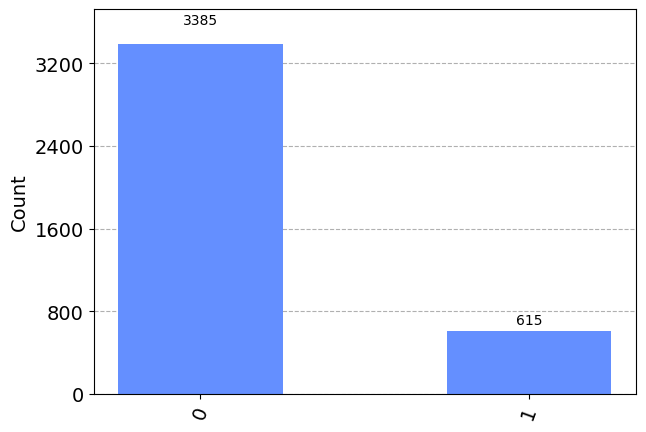

In [31]:
stats = v.sample_counts(4000)

plot_histogram(stats)